# Zomato Data Analysis Using Python

In [1]:
"""1) What type of restaurant do the majority of customers order from?
    2 How many votes has each type of restaurant received from customers?
    3) What are the ratings that the majority of restaurants have received?
    4)Zomato has observed that most couples order most of their food online. What is their 
    average spending on each order?
    5) Which mode (online or offline) has received the maximum rating?
    6) Which type of restaurant received more offline orders, so that Zomato can provide those 
    customers with some good offers?"""


'1) What type of restaurant do the majority of customers order from?\n    2 How many votes has each type of restaurant received from customers?\n    3) What are the ratings that the majority of restaurants have received?\n    4)Zomato has observed that most couples order most of their food online. What is their \n    average spending on each order?\n    5) Which mode (online or offline) has received the maximum rating?\n    6) Which type of restaurant received more offline orders, so that Zomato can provide those \ncustomers with some good offers?'

### Step 1: Import necessary Python Libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
""" pandas is used for data mainuplation and analysis.
    numpy is used for numerical operations.
    matplotlib.pyplot and seaborn are used for data visualization. """

' pandas is used for data mainuplation and analysis.\n    numpy is used for numerical operations.\n    matplotlib.pyplot and seaborn are used for data visualization. '

### Step 2: Create the dataframe

In [3]:
dataframe = pd.read_csv("zomato.csv")
print(dataframe.head())

                                                 url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5  

In [4]:
dataframe

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


### Let's convert the data type of the "rate" column to float and remove the denominator

In [5]:
def handleRate(value):
    try:
        value = str(value).split('/')
        return float(value[0])
    except (ValueError, IndexError):
        return None

dataframe['rate'] = dataframe['rate'].apply(handleRate)
print(dataframe.head())


                                                 url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    7

### Summary of the dataframe

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  object 
 4   book_table                   51717 non-null  object 
 5   rate                         41665 non-null  float64
 6   votes                        51717 non-null  int64  
 7   phone                        50509 non-null  object 
 8   location                     51696 non-null  object 
 9   rest_type                    51490 non-null  object 
 10  dish_liked                   23639 non-null  object 
 11  cuisines                     51672 non-null  object 
 12  approx_cost(for two people)  51371 non-null  object 
 13  reviews_list    

## Conclusion - The is no NULL value in dataframe

### Type of Resturant

Text(0.5, 0, 'Type of restaurant')

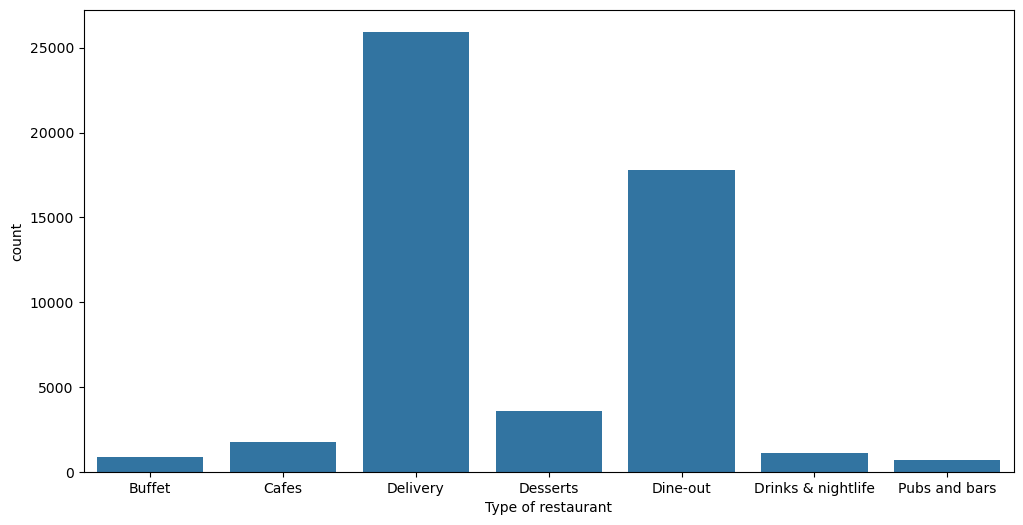

In [52]:
plt.figure(figsize = (12,6))
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")

### Conclusion: The majority of the restaurants fall into the dining category.

### Dining restaurants are preferred by a larger number of individuals.

Text(0, 0.5, 'Votes')

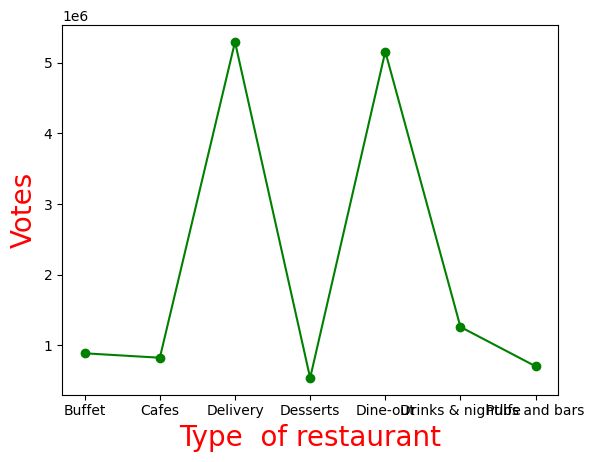

In [8]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green',marker='o')
plt.xlabel("Type  of restaurant", c='red',size=20)
plt.ylabel("Votes", c="red",size=20)

### The majority of restaurants received ratings

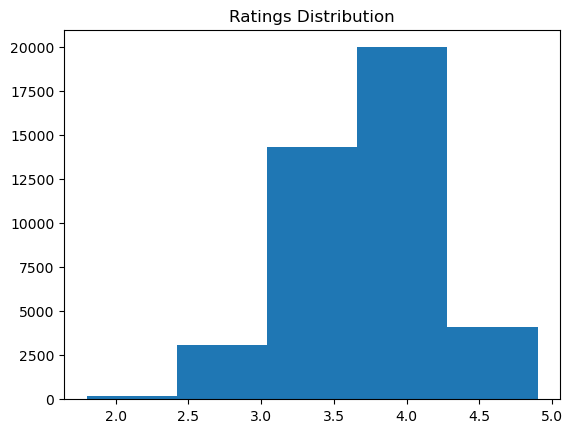

In [9]:
plt.hist(dataframe['rate'],bins = 5)
plt.title("Ratings Distribution")
plt.show()

### Conclusion: The majority of restaurants received ratings ranging from 3.5 to 4.

### The majority of couples prefer restaurants with an approximate cost of 300 rupees

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

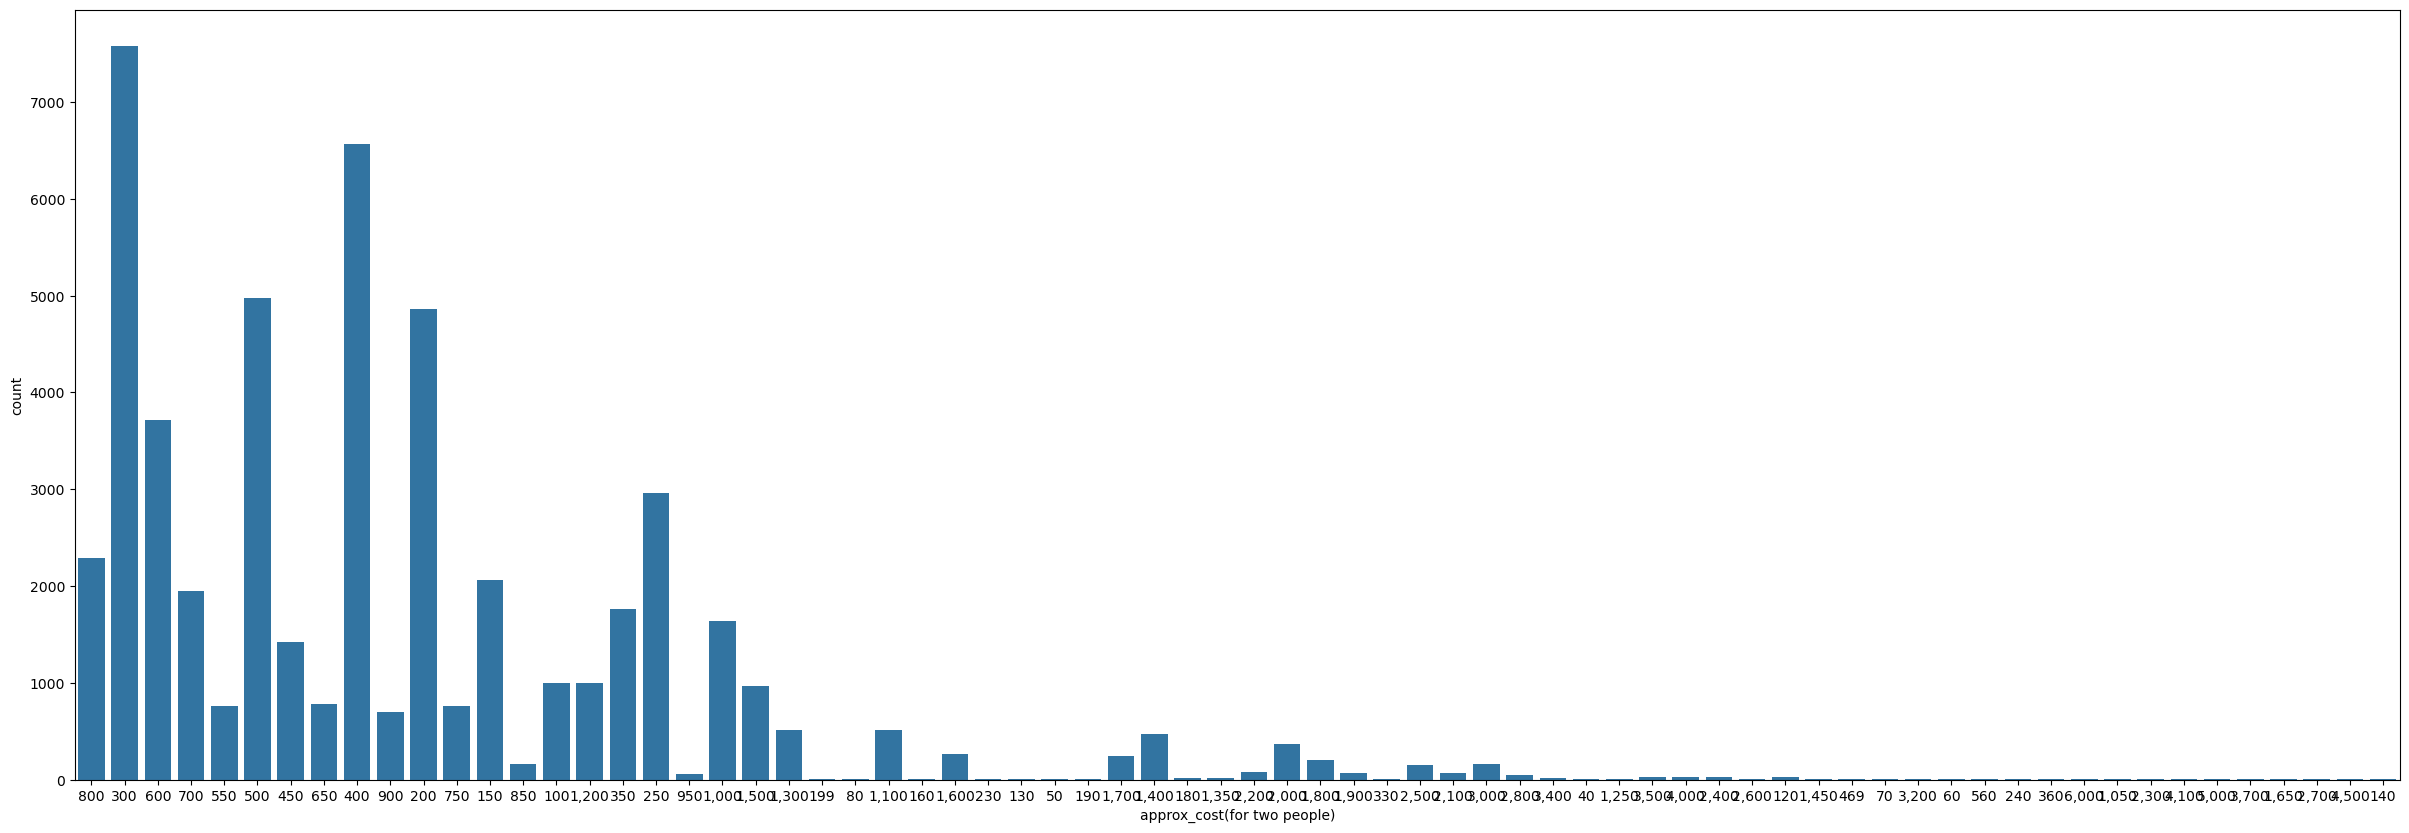

In [59]:
couple_data = dataframe['approx_cost(for two people)']
plt.figure(figsize = (30,10))
sns.countplot(x=couple_data)

### Whether online order receive higher ratings than offline orders

<Axes: xlabel='online_order', ylabel='rate'>

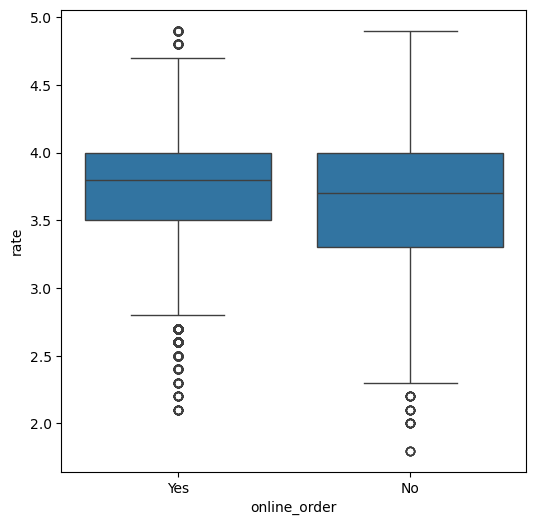

In [30]:
plt.figure(figsize=(6,6))
sns.boxplot(x = 'online_order',y = 'rate', data = dataframe)

### Conclusion: Offline orders received lower ratings in comparison to online orders,which obtained excellent ratings.

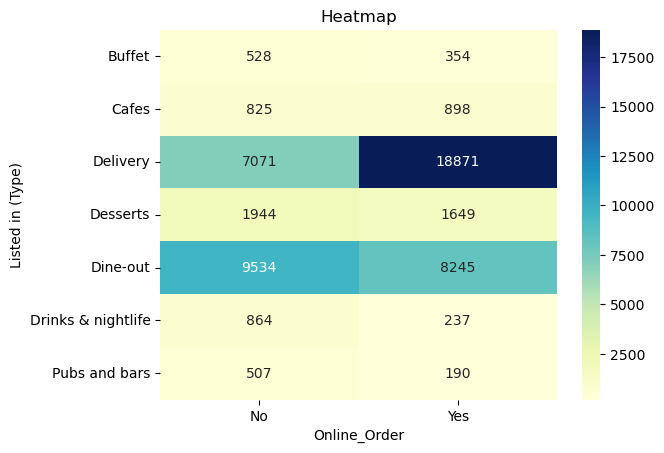

In [39]:
pivot_table = dataframe.pivot_table(index='listed_in(type)',columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot = True, cmap = 'YlGnBu',fmt = 'd') 
plt.title("Heatmap")
plt.xlabel("Online_Order")
plt.ylabel("Listed in (Type)")
plt.show()

## Conclusion: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, butprefer online ordering at cafes